
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [32]:
import seaborn as sns
from seaborn import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [33]:
auto = load_dataset('mpg')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [34]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [35]:
auto['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

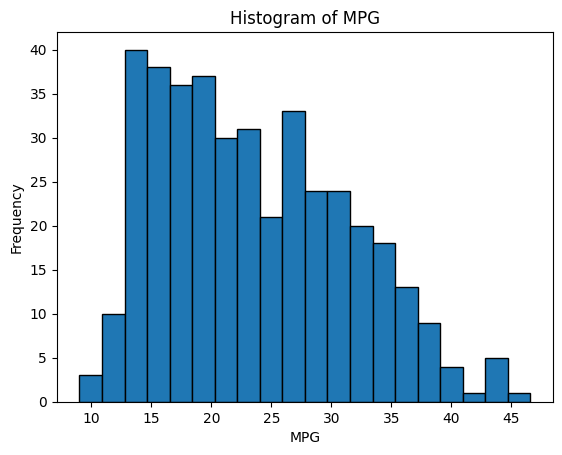

In [36]:
# Create a histogram of the 'mpg' column
plt.hist(auto['mpg'], bins=20, edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [37]:
# remove missing values
auto_no_nan = auto.dropna()

<Axes: >

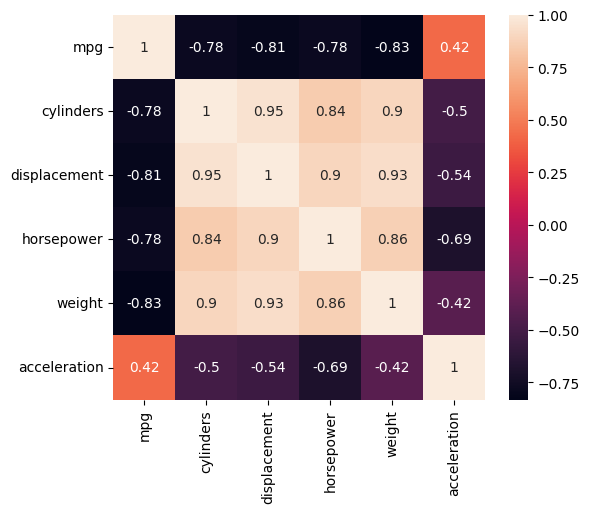

In [38]:
corr = auto_no_nan[['mpg','cylinders','displacement','horsepower','weight','acceleration']].corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True)

Horsepower är mest korrelerat till displacement (och antal cylindrar). Gör en multipel linjär regression, för att fylla i de saknade värdena.

In [39]:
# Define features (independent variables) and target (dependent variable)
X = auto_no_nan[["displacement","cylinders"]]  # Features
y = auto_no_nan["horsepower"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# View the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.35527886 -1.65348604]
Intercept: 44.19610787329522


In [41]:
X_test.iloc[0]

displacement    96.0
cylinders        4.0
Name: 79, dtype: float64

In [42]:
y_pred = model.predict(X_test)
y_pred

array([ 71.68893409,  80.57090554,  69.9125398 ,  69.9125398 ,
        87.32120385,  72.04421294, 173.07976282,  72.04421294,
       114.21293471,  61.74112606, 169.52697423,  89.69869349,
       155.3158199 ,  72.04421294,  92.1856455 ,  77.37339582,
       104.62040554,  75.95228039,  80.57090554,  80.9261844 ,
       104.62040554,  72.04421294,  69.9125398 , 140.038829  ,
        65.6491935 ,  72.3994918 ,  80.21562668, 114.21293471,
        72.04421294,  80.57090554, 155.3158199 , 116.69988672,
       125.82767467,  80.21562668, 173.07976282,  69.9125398 ,
       138.26243471,  72.22185237, 138.26243471, 158.86860849,
       140.038829  ,  69.55726094,  74.88644381,  72.04421294,
       155.67109876, 187.29091715, 123.09490617,  69.9125398 ,
        87.32120385,  69.55726094, 155.67109876,  77.72867468,
        87.32120385,  80.21562668, 116.69988672, 125.93713703,
       124.05128038, 116.69988672,  74.53116495,  77.72867468,
       192.62010002, 116.69988672,  95.73843408,  80.21

In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 253.03821237406552
R-squared: 0.8361338874123327


In [44]:
predict = model.predict([[307.0,8]])
predict

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([140.038829])

In [45]:
auto[auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


Använder modellen för att prediktera 'horsepower" på de bilar där 'horsepower' saknas. Loopar igenom hela dataframen och hittar de rader som har saknade värden.

In [46]:
# Loop through each row in the auto dataframe
for index, row in auto.iterrows():
    if pd.isna(row['horsepower']):
        # Predict the horsepower using the linear model
        predicted_hp = model.predict([[row['displacement'], row['cylinders']]])[0]
        # Update the dataframe with the predicted value
        auto.at[index, 'horsepower'] = predicted_hp

# Display the updated dataframe
auto.head()

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, bu

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Kolla att de ursprungligen saknade värden har värden.

In [47]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


E. Train | Val | Test split

In [48]:
X = auto[["displacement","cylinders","horsepower","weight","acceleration","model_year",]]  # Features
y = auto["mpg"]  # Target
# nedan var inte helt rätt:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ändrade till denna:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=80/318, random_state=42)

Kollar shape på de olika dataseten:

In [49]:
#for var in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
#    print(f'Shape: {var.shape}')

for var in [X_train, X_train_val, X_val, X_test]:
    print(f'Shape: {var.shape}')
          

Shape: (318, 6)
Shape: (238, 6)
Shape: (80, 6)
Shape: (80, 6)


Normaliserar med StandardScaler / MinMax scaler.

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_val_scaled = scaler.transform(X_train_val)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

In [51]:
import keras
from keras import layers

In [52]:
model = keras.models.Sequential(name="Two-hidden-layer-256-RELU-64-SIGMOID")
model.add(layers.InputLayer((X_train.shape[1],), name="input_layer")) # funkar också: model.add(layers.InputLayer((6,), name="input_layer"))
model.add(layers.Dense(256, activation='relu', name="hidden-layer-1"))
model.add(layers.Dense(64, activation='sigmoid', name="hidden-layer-2"))
#model.add(layers.Dense(16, activation='sigmoid',name="hidden-layer-3"))
#model.add(layers.Dense(1, activation='linear',name="output-layer"))
model.add(layers.Dense(1, activation='linear',name="output-layer"))

In [53]:
print(model.name)

Two-hidden-layer-256-RELU-64-SIGMOID


In [54]:
from keras.optimizers import SGD

model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=.005)) # wa 0.01 initially

#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "Two-hidden-layer-256-RELU-64-SIGMOID"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)          │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-2 (Dense)          │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

G: Implementerar EarlyStopping

In [55]:
#model.history.history.keys()
#type(model.history.history['loss'])
#model.history.history['loss'] = []
#model.history.history['val_loss'] = []
#print(model.history.history['loss'])
#print(model.history.history['val_loss'])

In [56]:
from keras.callbacks import EarlyStopping
#model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_valid_scaled, y_valid)) # utan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # early stopping
#model.fit(X_train_val_scaled, y_train_val, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping]) # med early stopping, med valideringsdata
#model.fit(X_test_scaled, y_test, epochs=25, batch_size=32)#, callbacks=[early_stopping]) # utan early stopping utan valideringsdata
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, callbacks=[early_stopping]) # utan early stopping utan valideringsdata

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 344.9471
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 27.8535
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 15.2759
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 12.9339
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 10.8676
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 13.1754
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 12.4245
Epoch 8/25
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 11.8779

c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning:

Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 11.8091
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3351
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 11.6170
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 10.7740
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 10.5974
Epoch 13/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 11.2178
Epoch 14/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 9.8017
Epoch 15/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.41937
Epoch 16/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5141  
Epoch 17/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 9.3676
Epoch 18/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 8.0589
Epoch 19/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 9.6803
Epoch 20/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 9.8728 
Epoch 21/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 10.3092
Epoch 22/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - lo

In [57]:
print(model.history.history.keys())
print(model.history.history['loss'])
#print(model.history.history['val_loss'])
print(f"Number of epochs used: {len(model.history.history['loss'])}") # uppgift G

dict_keys(['loss'])
[213.20919799804688, 23.552644729614258, 15.250865936279297, 13.420918464660645, 12.579998016357422, 11.95218276977539, 11.534130096435547, 11.184037208557129, 10.807153701782227, 10.493917465209961, 10.256634712219238, 10.172558784484863, 9.801545143127441, 9.69182014465332, 9.59814453125, 9.283535957336426, 9.162323951721191, 8.930041313171387, 8.839439392089844, 8.639339447021484, 8.596022605895996, 8.376348495483398, 8.368785858154297, 8.431910514831543, 8.323934555053711]
Number of epochs used: 25


<Axes: title={'center': 'Loss vs. Epochs\nTwo-hidden-layer-256-RELU-64-SIGMOID\ncomplete train data'}, xlabel='Epochs', ylabel='Loss'>

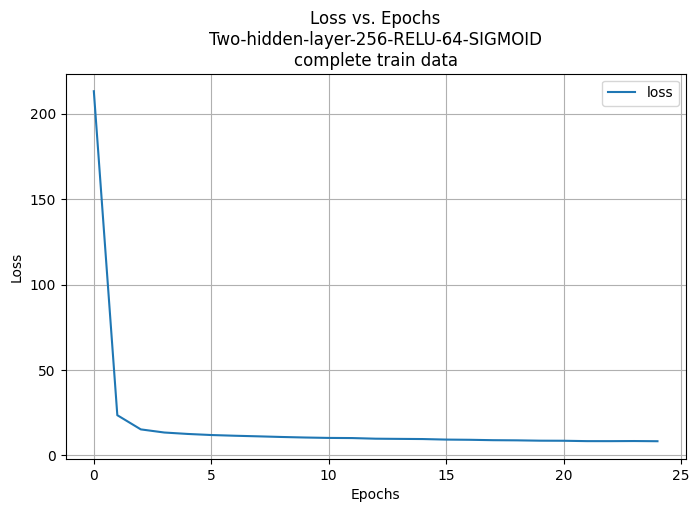

In [59]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5), grid=True, title=f"Loss vs. Epochs\n{model.name}\ncomplete train data", xlabel="Epochs", ylabel="Loss")
#import plotly.express as px

#fig = px.line(pd.DataFrame(model.history.history), title=f"Loss vs. Epochs\n{model.name}")
#fig.update_layout(xaxis_title="Epochs", yaxis_title="Loss")
#fig.write_html(f"E0-MLP_loss_vs_epochs_{model.name}_Complete_Train.html")

<Axes: title={'center': 'Loss vs. Epochs\nTwo-hidden-layer-256-RELU-64-SIGMOID'}, xlabel='Epochs', ylabel='Loss'>

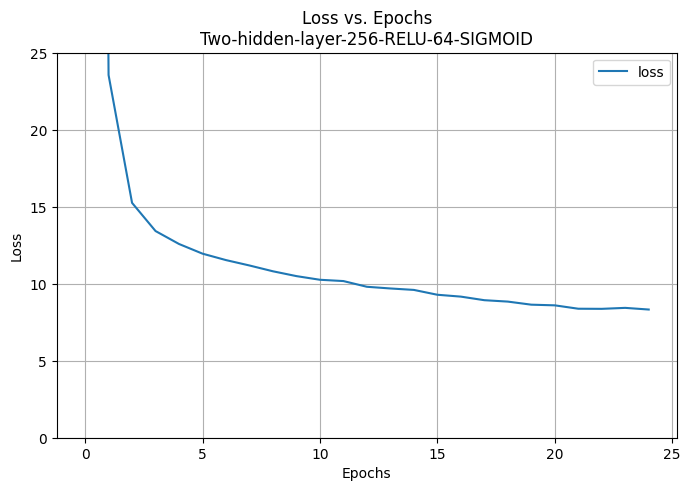

In [60]:
pd.DataFrame(model.history.history).plot(figsize=(8,5), grid=True, title=f"Loss vs. Epochs\n{model.name}", xlabel="Epochs", ylabel="Loss", ylim=(0, 25))

In [61]:
# inspect the model
model_params ={}
layers = model.layers
layers
for layer in layers:
    model_params[layer.name] = {
        "units": layer.units,
        "activation": layer.activation.__name__,
        "use_bias": layer.use_bias,
        "trainable": layer.trainable,
        "total params": layer.count_params()
    }

print(model_params)

{'hidden-layer-1': {'units': 256, 'activation': 'relu', 'use_bias': True, 'trainable': True, 'total params': 1792}, 'hidden-layer-2': {'units': 64, 'activation': 'sigmoid', 'use_bias': True, 'trainable': True, 'total params': 16448}, 'output-layer': {'units': 1, 'activation': 'linear', 'use_bias': True, 'trainable': True, 'total params': 65}}


In [62]:
import numpy as np
loss = np.average(model.history.history['loss'][-3:-1])
#val_loss = np.average(model.history.history['val_loss'][-3:-1])
print(f"Number of epochs: {len(model.history.history['loss'])}")
print(f"loss = {loss}")
#print(f"val_loss = {val_loss}") 

Number of epochs: 25
loss = 8.40034818649292


In [63]:
print(existing_results)

NameError: name 'existing_results' is not defined

In [ ]:
#existing_results = []

In [64]:
from datetime import datetime
import json
import os

scaler_info = r"StandardScaler"
now = datetime.now()
results = {
    "timestamp": now.strftime("%Y-%m-%d %H:%M:%S"),
    "model name": model.name,
    "loss function": model.loss,
    "mse": mse,
    "r2": r2,
    "loss": loss,
    #"val_loss": val_loss,
    "Number of epochs": len(model.history.history['loss']),
    "Model Parameters": model_params,
    "Scaler": scaler_info,
    "Misc" : " "
}

# Load existing results if the file exists and is not empty
if os.path.exists("E0-MLP_Results.json") and os.path.getsize("E0-MLP_Results.json") > 0:
    try:
        with open("E0-MLP_Results.json", "r") as f:
            existing_results = json.load(f)
            if not isinstance(existing_results, list):
                existing_results = []
    except json.JSONDecodeError:
        existing_results = []
else:
    existing_results = []
print(existing_results)
# Append new results
existing_results.append(results)
#print(existing_results)
# Save updated results
with open("E0-MLP_Results.json", "w") as f:
    json.dump(existing_results, f)

[{'timestamp': '2024-11-19 18:06:40', 'mse': 253.03821237406552, 'r2': 0.8361338874123327, 'loss': 9.406994819641113, 'val_loss': 7.078213930130005, 'Number of epochs': 30, 'Model Parameters': {'hidden-layer-1': {'units': 64, 'activation': 'relu', 'use_bias': True, 'trainable': True, 'total params': 448}, 'hidden-layer-2': {'units': 32, 'activation': 'sigmoid', 'use_bias': True, 'trainable': True, 'total params': 2080}, 'output-layer': {'units': 1, 'activation': 'linear', 'use_bias': True, 'trainable': True, 'total params': 33}}}, {'timestamp': '2024-11-19 18:09:40', 'mse': 253.03821237406552, 'r2': 0.8361338874123327, 'loss': 15.723642826080322, 'val_loss': 9.181439399719238, 'Number of epochs': 30, 'Model Parameters': {'hidden-layer-1': {'units': 64, 'activation': 'relu', 'use_bias': True, 'trainable': True, 'total params': 448}, 'hidden-layer-2': {'units': 32, 'activation': 'relu', 'use_bias': True, 'trainable': True, 'total params': 2080}, 'output-layer': {'units': 1, 'activation':

In [ ]:
existing_results
#with open("existing_results.json", "w") as f:
#    json.dump(existing_results, f)

[{'timestamp': '2024-11-19 18:06:40',
  'mse': 253.03821237406552,
  'r2': 0.8361338874123327,
  'loss': 9.406994819641113,
  'val_loss': 7.078213930130005,
  'Number of epochs': 30,
  'Model Parameters': {'hidden-layer-1': {'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'trainable': True,
    'total params': 448},
   'hidden-layer-2': {'units': 32,
    'activation': 'sigmoid',
    'use_bias': True,
    'trainable': True,
    'total params': 2080},
   'output-layer': {'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'trainable': True,
    'total params': 33}}},
 {'timestamp': '2024-11-19 18:09:40',
  'mse': 253.03821237406552,
  'r2': 0.8361338874123327,
  'loss': 15.723642826080322,
  'val_loss': 9.181439399719238,
  'Number of epochs': 30,
  'Model Parameters': {'hidden-layer-1': {'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'trainable': True,
    'total params': 448},
   'hidden-layer-2': {'units': 32,
    'activation': 'relu',


G: När man ska använda EarlyStopping så måste man först importera den:  
  
`from keras.callbacks import EarlyStopping)`
  
Sedan definera en variabel med olika inställningar för EarlyStopping, samt därefter addera den till model.fit()  
  
`early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)`  
`model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])`  
  
H: Man använder EarlyStopping för att hitta antale epochs. När man ska träna på all träningsdata (inklusive valideringsdatan), så får man manuellt ändra till den datan som man ska använda.
  
Det är viktigt att man definierar sina dataset korrekt. Jag gjorde fel i början, man ska ha ett X_train + X_test (initialt). Sedan ska man dela upp X_train i X_train_val och X_val. Man använde valideringsdatasetet för att mha EarlyStopping hitta antalet epoker. Sedan tränar man på hela datasetet, och slutligen evaluerar man modellen med X_test.

I: Predict on test data and evaluate: Bästa antalet epoker var ungefär 25 stycken. Ändrade datasetet till X_test och y_test. Loss blev 7.35. Vald loss funktion är "mean squared error". Dvs, i medel predikterar vi ungefär roten ur 6.27 mpg fel, vilket är 2.5 mpg.

In [65]:
model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[33.53415  ],
       [32.66177  ],
       [19.788706 ],
       [15.8288965],
       [14.018728 ],
       [25.215458 ],
       [29.764984 ],
       [12.033405 ],
       [16.184322 ],
       [19.155338 ],
       [14.166779 ],
       [36.120117 ],
       [26.04879  ],
       [14.970564 ],
       [24.081402 ],
       [12.052729 ],
       [32.422546 ],
       [20.801779 ],
       [14.9672165],
       [36.2306   ],
       [23.152752 ],
       [18.776922 ],
       [27.24995  ],
       [30.491241 ],
       [15.727781 ],
       [36.62541  ],
       [24.952047 ],
       [24.500208 ],
       [19.278494 ],
       [12.560809 ],
       [30.66796  ],
       [35.608963 ],
       [17.133253 ],
       [23.53433  ],
       [34.933678 ],
       [13.042749 ],
       [21.487886 ],
       [17.983995 ],
       [14.126963 ],
       [26.416632 ],
       [25.07158  ],
       [27.902681 ],
       [20.057158 ],
       [11.236401 ],
       [22.423122 ],
       [33.877495 ],
       [26.690607 ],
       [21.99

In [66]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [67]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, explained_variance_score

# Predictions
y_pred = model.predict(X_test_scaled)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((np.array(y_test) - y_pred) / np.array(y_test))) * 100
print("Mean Absolute Percentage Error:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error: 1.8961610651016236
Root Mean Squared Error: 2.553880024019738
Mean Absolute Percentage Error: 40.72846915266461
Explained Variance Score: 0.8787421273252143


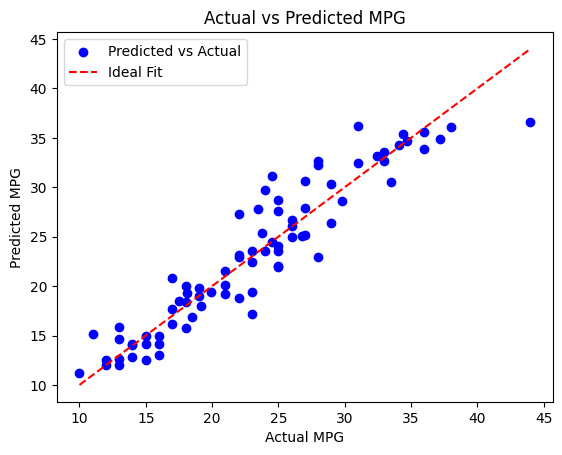

In [68]:
import matplotlib.pyplot as plt

# Scatter plot of y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()

# Show the plot
plt.show()

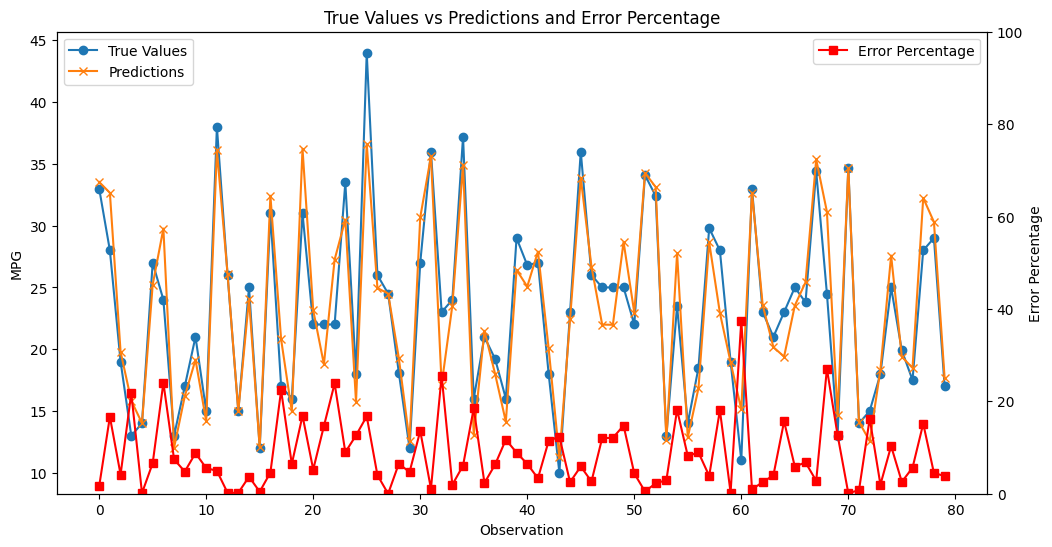

In [70]:
import matplotlib.pyplot as plt
# Calculate the error percentage for each prediction
error_percentage = np.abs((y_test.values - y_pred.flatten()) / y_test.values) * 100
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the true values and predictions on the first y-axis
ax1.plot(range(len(y_test)), y_test, label='True Values', marker='o')
ax1.plot(range(len(y_test)), y_pred, label='Predictions', marker='x')
ax1.set_xlabel('Observation')
ax1.set_ylabel('MPG')
ax1.set_title('True Values vs Predictions and Error Percentage')
ax1.legend(loc='upper left')

# Create a second y-axis for the error percentage
ax2 = ax1.twinx()
ax2.plot(range(len(y_test)), error_percentage, label='Error Percentage', marker='s', color='red')
ax2.set_ylabel('Error Percentage')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

# Show the plot
plt.show()


## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

#### Plan för att analysera heart datasetet:  
Typ av problem: binärt klassificeringsproblem (cardio eller inte cardio)  
Dataset: Använder samma data som i Machine Learning kursen. Feature engineering är redan gjord.  
Två dataset finns:  
1. Linjär data:  
2. Kategorisk data:  

Workflow:  
1. Läs in data, gör EDA, kom ihåg vad vi gjorde i ML kursen, mm. Börjar med categorical data eftersom den visade bäst resultat i ML kursen.  
2. Definiera Explanatory Variables (X) och Response Variable (y)  
3. Definera träningsdata, valideringsdata och testdata (train/val/test-split)  
4. Normalisera datan med Standard scaler  
5. Bygg modellen (definiera en funktion som bygger modellen baserat på argument)  
6. Utvärdera modellen/modellerna.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df_cat = pd.read_csv(r'data/cardio_train_categorical.csv', sep=';')
df_cat.head()

,age,gender,ap_hi,cholesterol,gluc,cardio,BMI
0,18393,2,110,1,1,0,21.97
1,20228,1,140,3,1,1,34.93
2,18857,1,130,3,1,1,23.51
3,17623,2,150,1,1,1,28.71
4,17474,1,100,1,1,0,23.01


In [4]:
X, y = df_cat.drop('cardio', axis=1), df_cat['cardio']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
import keras
from keras import layers
from keras.optimizers import SGD, Adam

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss = "sparse_categorical_crossentropy"


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def make_model(nodes = None, names = None, activations = [], optimizer=None, loss=loss):
    model = keras.Sequential(name="MLP")
    #model.add(layers.Flatten(input_shape=(28,28), name="Input"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))

    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return model

def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0], title=metric[0],
                        ax=ax, style=style)


def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix", model_name="model_name"):
    cm = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, target_names=labels)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix\n{model_name}")
    plt.show()
    print(classification_rep)

Defining optimizer and loss function:

## Model_1
Defining model_deep_1:

In [12]:
model_deep_1 = make_model([128,128,10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"], optimizer=optimizer, loss = loss)
model_deep_1.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_deep_1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [14]:
deep_1_history = pd.DataFrame(model_deep_1.history.history)

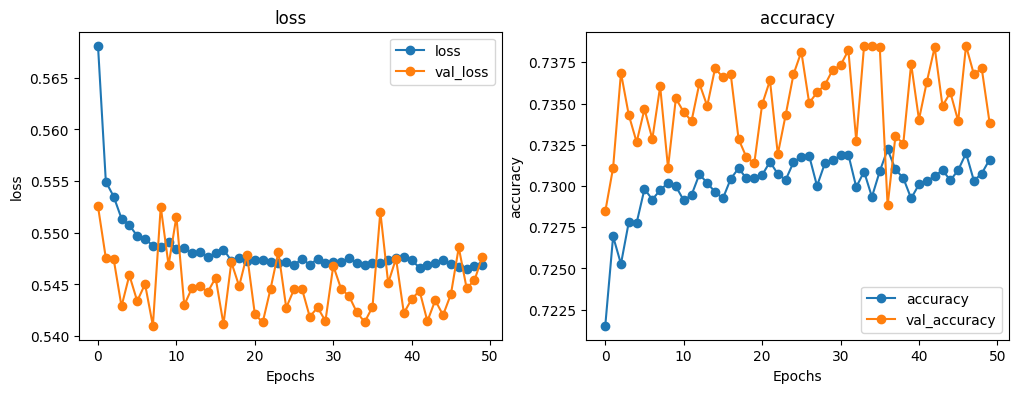

In [15]:
plot_metrics(deep_1_history)

Predict y_pred.

In [16]:
model_deep_1_y_pred = model_deep_1.predict(X_test_scaled)

428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


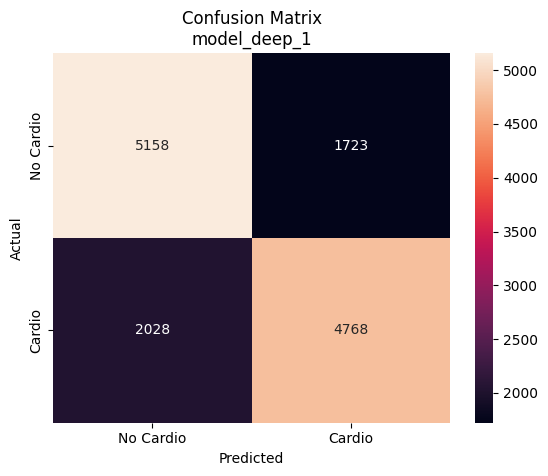

              precision    recall  f1-score   support

   No Cardio       0.72      0.75      0.73      6881
      Cardio       0.73      0.70      0.72      6796

    accuracy                           0.73     13677
   macro avg       0.73      0.73      0.73     13677
weighted avg       0.73      0.73      0.73     13677



In [17]:
plot_confusion_matrix(y_test, model_deep_1_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_1")

## Model2:
Defining model_deep_2:

In [21]:
model_deep_2 = make_model([128,128,128,10], activations=["relu", "relu","relu","softmax"], names=["Hidden_1", "Hidden_2","Hidden_3","Output"], optimizer=optimizer, loss = loss)
model_deep_2.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

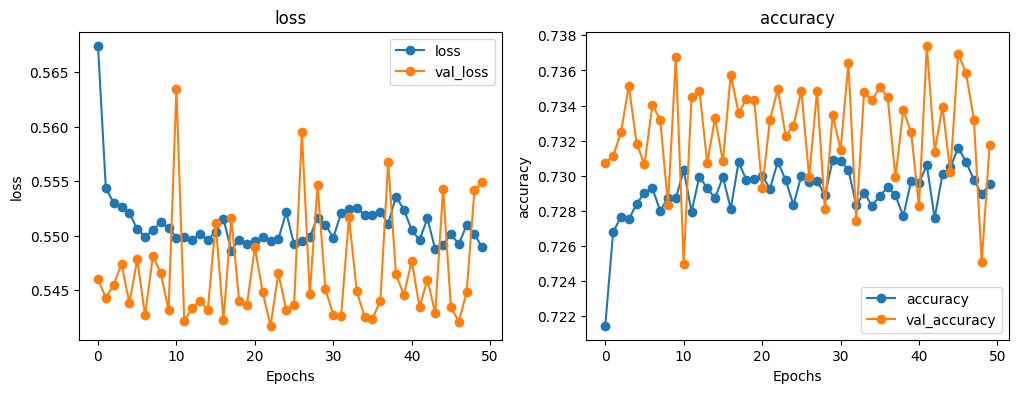

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss = "sparse_categorical_crossentropy"

model_deep_2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
deep_2_history = pd.DataFrame(model_deep_2.history.history)
plot_metrics(deep_2_history)

In [23]:
model_deep_2_y_pred = model_deep_2.predict(X_test_scaled)

428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


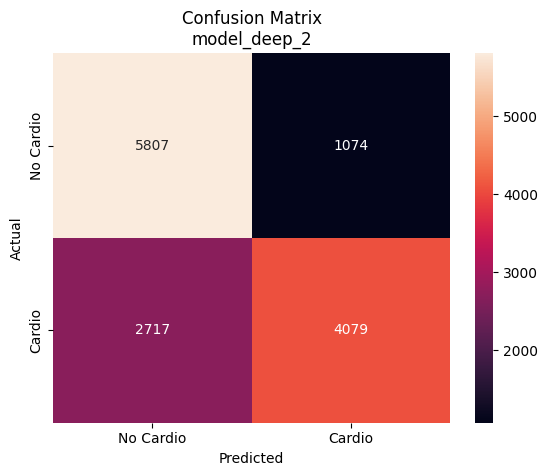

              precision    recall  f1-score   support

   No Cardio       0.68      0.84      0.75      6881
      Cardio       0.79      0.60      0.68      6796

    accuracy                           0.72     13677
   macro avg       0.74      0.72      0.72     13677
weighted avg       0.74      0.72      0.72     13677



In [24]:
plot_confusion_matrix(y_test, model_deep_2_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_2")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---